## 190531L Rukmal.M.A.D

 ### Q(1)

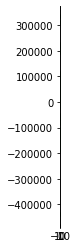

In [46]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt

#np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform (0,2*np.pi,half_n)
n = s*np.random.randn(half_n)
x,y = (r + n)*np.cos( t ),( r + n)*np.sin( t )
X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1))) #list of cordinates of points 
figure, axes = plt.subplots()
#RANSAC Algorithm
N = 80; #number of repititive fittings
Inlier_ratio=0.9 # Inlier ratio
marginal_dis = 1; #distance from circle that points are considered as inliers
critic_inlier_count = 40
for i in range(0,N,1):
    #choosing 3 random points to uniquely define a circle
    ind_1,ind_2,ind_3 =np.random.randint(50),np.random.randint(50),np.random.randint(50)
    coord_1,coord_2,coord_3 = X_circ[ind_1],X_circ[ind_2],X_circ[ind_3]
    x1,y1,x2,y2,x3,y3=coord_1[0],coord_1[1],coord_2[0],coord_2[1],coord_3[0],coord_3[1]
    #calculating centre and radius of the circle
    c = (x1-x2)**2 + (y1-y2)**2
    a = (x2-x3)**2 + (y2-y3)**2
    b = (x3-x1)**2 + (y3-y1)**2
    s = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c) 
    cent_x = (a*(b+c-a)*x1 + b*(c+a-b)*x2 + c*(a+b-c)*x3) / s
    cent_y = (a*(b+c-a)*y1 + b*(c+a-b)*y2 + c*(a+b-c)*y3) / s 
    ar = a**0.5
    br = b**0.5
    cr = c**0.5 
    radi = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5
    
    inlier_count=0;
    #distance to the points
    for j in range(0,50):
        dis=((X_circ[j][0]-cent_x)**2 +(X_circ[j][1]-cent_y)**2)**0.5
        Is_inlier=abs(dis-radi)<=marginal_dis
        if(Is_inlier):
            inlier_count+=1

    if(critic_inlier_count<=inlier_count):
        axes.plot(x,y,".")
        axes.plot(cent_x,cent_y,'+')
        draw_circle = plt.Circle((cent_x,cent_y), radi,fill=False)
        axes.set_aspect(1)
        axes.add_artist(draw_circle)
        break
 

m,b = -1,2
x = np.linspace(-12,12,half_n)
y = m*x+b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n,1), y.reshape(half_n,1)))
X = np.vstack((X_circ,X_line))
axes.plot(x,y,".",)
plt.show()
#plt.legend()



In [44]:
np.random.randint(3)

0